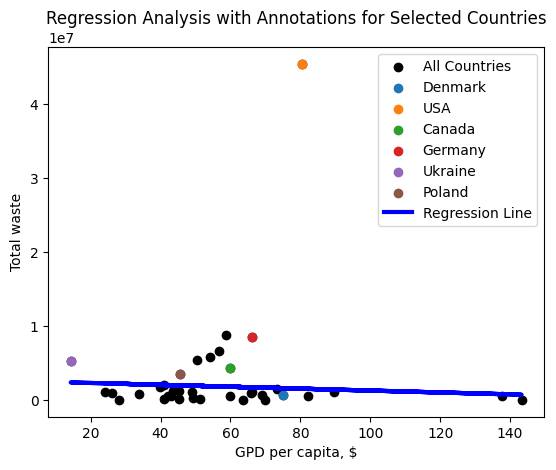

In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Replace 'your_data.csv' with the path to your data file
file_path = './updated_dataset.csv'
data = pd.read_csv(file_path)

# Total waste as the target variable
data['Total waste'] = data[['Household estimate (tonnes/year)', 'Food service estimate (tonnes/year)', 'Retail estimate (tonnes/year)']].sum(axis=1)

# Select only the chosen countries
selected_countries = ['Denmark', 'USA', 'Canada', 'Germany', 'Ukraine', 'Poland']
selected_data = data[data['Country'].isin(selected_countries)]

# Define dependent and independent variables
X = data[['GPD per capita, $']]
y = data['Total waste']

# Split data into training and testing sets (used for visualization purposes only)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on all data
predictions = model.predict(X)

# Visualization with annotations for selected countries
plt.scatter(X, y, color='black', label='All Countries')

for country in selected_countries:
    country_data = selected_data[selected_data['Country'] == country]
    plt.scatter(country_data['GPD per capita, $'], country_data['Total waste'], label=country)

plt.plot(X, predictions, color='blue', linewidth=3, label='Regression Line')
plt.xlabel('GPD per capita, $')
plt.ylabel('Total waste')
plt.title('Regression Analysis with Annotations for Selected Countries')
plt.legend()
plt.show()




Countries below the regression line have total food waste less than predicted by their GDP per capita. This may indicate effective waste management or successful initiatives in these countries. Analyzing these model countries can serve as a benchmark for other regions, aiding in refining waste management strategies. It is crucial to consider additional influencing factors, such as infrastructure and cultural aspects, for a comprehensive understanding of the context and optimization of programs.


Regarding America, positioned in the top right corner far from the regression line, its substantial distance from the regression line indicates that it has higher total food waste than what would be predicted based on its GDP per capita. This outlier status suggests that the United States may experience higher food waste levels compared to what is typically associated with its level of economic development. Further investigation into the specific factors contributing to this deviation could provide insights into waste management challenges or unique consumption patterns in the United States.